In [1]:
import pandas as pd
import numpy as np

In [2]:
loan = pd.read_csv("loan.csv")

C:\Users\kevin\AppData\Local\Temp\ipykernel_16500\3592418794.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("loan.csv")


In [3]:
loan.isna().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64

In [4]:
loan['application_type'].value_counts()

application_type
INDIVIDUAL    886868
JOINT            511
Name: count, dtype: int64

In [5]:
loan_indv = loan[loan['application_type']=='INDIVIDUAL']

In [6]:
loan_indv['application_type'].value_counts()

application_type
INDIVIDUAL    886868
Name: count, dtype: int64

In [7]:
regression_Y_columns = [
    'annual_inc', 'delinq_2yrs', 'dti', 'emp_title', 'emp_length', 'funded_amnt', 'grade',
    'home_ownership', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'loan_amnt',
    'loan_status', 'mths_since_last_delinq', 'pub_rec', 'purpose', 'sub_grade', 'term', 'title',
    'total_acc', 'total_pymnt', 'acc_now_delinq'
]

# Select only the columns with Regression = 'Y'
loan_indv_cleaned = loan_indv[regression_Y_columns]
loan_indv_cleaned

,annual_inc,delinq_2yrs,dti,emp_title,emp_length,funded_amnt,grade,home_ownership,inq_last_6mths,installment,...,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,total_pymnt,acc_now_delinq
0,24000.0,0.0,27.65,NaN,10+ years,5000.0,B,RENT,1.0,162.87,...,Fully Paid,NaN,0.0,credit_card,B2,36 months,Computer,9.0,5861.071414,0.0
1,30000.0,0.0,1.00,Ryder,< 1 year,2500.0,C,RENT,5.0,59.83,...,Charged Off,NaN,0.0,car,C4,60 months,bike,4.0,1008.710000,0.0
2,12252.0,0.0,8.72,NaN,10+ years,2400.0,C,RENT,2.0,84.33,...,Fully Paid,NaN,0.0,small_business,C5,36 months,real estate business,10.0,3003.653644,0.0
3,49200.0,0.0,20.00,AIR RESOURCES BOARD,10+ years,10000.0,C,RENT,1.0,339.31,...,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,12226.302212,0.0
4,80000.0,0.0,17.94,University Medical Group,1 year,3000.0,B,RENT,0.0,67.79,...,Current,38.0,0.0,other,B5,60 months,Personal,38.0,3242.170000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,31000.0,0.0,28.69,Office Assistant,8 years,10000.0,B,RENT,0.0,332.10,...,Current,NaN,1.0,debt_consolidation,B5,36 months,Debt consolidation,15.0,3971.880000,0.0
887375,79000.0,0.0,3.90,Director of Maintenance,10+ years,24000.0,B,MORTGAGE,1.0,797.03,...,Current,26.0,0.0,home_improvement,B5,36 months,Home improvement,23.0,9532.390000,0.0
887376,35000.0,0.0,30.90,Radiologist Technologist,5 years,13000.0,D,RENT,0.0,316.07,...,Current,NaN,1.0,debt_consolidation,D2,60 months,Debt consolidation,22.0,3769.740000,0.0
887377,64400.0,1.0,27.19,Painter,1 year,12000.0,E,RENT,2.0,317.86,...,Current,22.0,0.0,debt_consolidation,E3,60 months,Debt consolidation,20.0,3787.670000,0.0


In [8]:
loan_indv_cleaned['mths_since_last_delinq'] = loan_indv_cleaned['mths_since_last_delinq'].fillna(0)
loan_indv_cleaned

C:\Users\kevin\AppData\Local\Temp\ipykernel_16500\2437688461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_indv_cleaned['mths_since_last_delinq'] = loan_indv_cleaned['mths_since_last_delinq'].fillna(0)


,annual_inc,delinq_2yrs,dti,emp_title,emp_length,funded_amnt,grade,home_ownership,inq_last_6mths,installment,...,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,total_pymnt,acc_now_delinq
0,24000.0,0.0,27.65,NaN,10+ years,5000.0,B,RENT,1.0,162.87,...,Fully Paid,0.0,0.0,credit_card,B2,36 months,Computer,9.0,5861.071414,0.0
1,30000.0,0.0,1.00,Ryder,< 1 year,2500.0,C,RENT,5.0,59.83,...,Charged Off,0.0,0.0,car,C4,60 months,bike,4.0,1008.710000,0.0
2,12252.0,0.0,8.72,NaN,10+ years,2400.0,C,RENT,2.0,84.33,...,Fully Paid,0.0,0.0,small_business,C5,36 months,real estate business,10.0,3003.653644,0.0
3,49200.0,0.0,20.00,AIR RESOURCES BOARD,10+ years,10000.0,C,RENT,1.0,339.31,...,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,12226.302212,0.0
4,80000.0,0.0,17.94,University Medical Group,1 year,3000.0,B,RENT,0.0,67.79,...,Current,38.0,0.0,other,B5,60 months,Personal,38.0,3242.170000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,31000.0,0.0,28.69,Office Assistant,8 years,10000.0,B,RENT,0.0,332.10,...,Current,0.0,1.0,debt_consolidation,B5,36 months,Debt consolidation,15.0,3971.880000,0.0
887375,79000.0,0.0,3.90,Director of Maintenance,10+ years,24000.0,B,MORTGAGE,1.0,797.03,...,Current,26.0,0.0,home_improvement,B5,36 months,Home improvement,23.0,9532.390000,0.0
887376,35000.0,0.0,30.90,Radiologist Technologist,5 years,13000.0,D,RENT,0.0,316.07,...,Current,0.0,1.0,debt_consolidation,D2,60 months,Debt consolidation,22.0,3769.740000,0.0
887377,64400.0,1.0,27.19,Painter,1 year,12000.0,E,RENT,2.0,317.86,...,Current,22.0,0.0,debt_consolidation,E3,60 months,Debt consolidation,20.0,3787.670000,0.0


In [9]:
loan_indv_cleaned.isna().sum()

annual_inc                    4
delinq_2yrs                  29
dti                           0
emp_title                 51401
emp_length                44764
funded_amnt                   0
grade                         0
home_ownership                0
inq_last_6mths               29
installment                   0
int_rate                      0
issue_d                       0
loan_amnt                     0
loan_status                   0
mths_since_last_delinq        0
pub_rec                      29
purpose                       0
sub_grade                     0
term                          0
title                       144
total_acc                    29
total_pymnt                   0
acc_now_delinq               29
dtype: int64

In [10]:
loan_indv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886868 entries, 0 to 887378
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   annual_inc              886864 non-null  float64
 1   delinq_2yrs             886839 non-null  float64
 2   dti                     886868 non-null  float64
 3   emp_title               835467 non-null  object 
 4   emp_length              842104 non-null  object 
 5   funded_amnt             886868 non-null  float64
 6   grade                   886868 non-null  object 
 7   home_ownership          886868 non-null  object 
 8   inq_last_6mths          886839 non-null  float64
 9   installment             886868 non-null  float64
 10  int_rate                886868 non-null  float64
 11  issue_d                 886868 non-null  object 
 12  loan_amnt               886868 non-null  float64
 13  loan_status             886868 non-null  object 
 14  mths_since_last_delinq  8

In [11]:
loan_indv_cleaned= loan_indv_cleaned.dropna(subset=['delinq_2yrs'])
loan_indv_cleaned

,annual_inc,delinq_2yrs,dti,emp_title,emp_length,funded_amnt,grade,home_ownership,inq_last_6mths,installment,...,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,total_pymnt,acc_now_delinq
0,24000.0,0.0,27.65,NaN,10+ years,5000.0,B,RENT,1.0,162.87,...,Fully Paid,0.0,0.0,credit_card,B2,36 months,Computer,9.0,5861.071414,0.0
1,30000.0,0.0,1.00,Ryder,< 1 year,2500.0,C,RENT,5.0,59.83,...,Charged Off,0.0,0.0,car,C4,60 months,bike,4.0,1008.710000,0.0
2,12252.0,0.0,8.72,NaN,10+ years,2400.0,C,RENT,2.0,84.33,...,Fully Paid,0.0,0.0,small_business,C5,36 months,real estate business,10.0,3003.653644,0.0
3,49200.0,0.0,20.00,AIR RESOURCES BOARD,10+ years,10000.0,C,RENT,1.0,339.31,...,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,12226.302212,0.0
4,80000.0,0.0,17.94,University Medical Group,1 year,3000.0,B,RENT,0.0,67.79,...,Current,38.0,0.0,other,B5,60 months,Personal,38.0,3242.170000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,31000.0,0.0,28.69,Office Assistant,8 years,10000.0,B,RENT,0.0,332.10,...,Current,0.0,1.0,debt_consolidation,B5,36 months,Debt consolidation,15.0,3971.880000,0.0
887375,79000.0,0.0,3.90,Director of Maintenance,10+ years,24000.0,B,MORTGAGE,1.0,797.03,...,Current,26.0,0.0,home_improvement,B5,36 months,Home improvement,23.0,9532.390000,0.0
887376,35000.0,0.0,30.90,Radiologist Technologist,5 years,13000.0,D,RENT,0.0,316.07,...,Current,0.0,1.0,debt_consolidation,D2,60 months,Debt consolidation,22.0,3769.740000,0.0
887377,64400.0,1.0,27.19,Painter,1 year,12000.0,E,RENT,2.0,317.86,...,Current,22.0,0.0,debt_consolidation,E3,60 months,Debt consolidation,20.0,3787.670000,0.0


In [12]:
loan_indv_cleaned.isna().sum()

annual_inc                    0
delinq_2yrs                   0
dti                           0
emp_title                 51389
emp_length                44764
funded_amnt                   0
grade                         0
home_ownership                0
inq_last_6mths                0
installment                   0
int_rate                      0
issue_d                       0
loan_amnt                     0
loan_status                   0
mths_since_last_delinq        0
pub_rec                       0
purpose                       0
sub_grade                     0
term                          0
title                       144
total_acc                     0
total_pymnt                   0
acc_now_delinq                0
dtype: int64

In [13]:
loan_indv_cleaned['emp_length'].value_counts()

emp_length
10+ years    291400
2 years       78832
< 1 year      70541
3 years       69992
1 year        57061
5 years       55686
4 years       52496
7 years       44576
8 years       43930
6 years       42927
9 years       34634
Name: count, dtype: int64

In [14]:
loan_indv_cleaned[loan_indv_cleaned['emp_length'].isna()]

,annual_inc,delinq_2yrs,dti,emp_title,emp_length,funded_amnt,grade,home_ownership,inq_last_6mths,installment,...,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,total_pymnt,acc_now_delinq
168,12000.0,0.0,16.30,NaN,NaN,2500.0,A,OWN,2.0,77.78,...,Charged Off,0.0,0.0,debt_consolidation,A3,36 months,GET FREE OF DEBT,20.0,1838.880000,0.0
323,60000.0,0.0,21.96,NaN,NaN,18000.0,D,MORTGAGE,1.0,452.98,...,Fully Paid,75.0,0.0,debt_consolidation,D4,60 months,consolidation,28.0,26369.525524,0.0
394,24000.0,1.0,7.50,NaN,NaN,4000.0,B,RENT,0.0,132.31,...,Fully Paid,16.0,0.0,home_improvement,B3,36 months,Reline pool and fix steeps,6.0,4185.930000,0.0
422,18408.0,0.0,6.00,NaN,NaN,1000.0,C,RENT,2.0,34.50,...,Charged Off,0.0,1.0,major_purchase,C3,36 months,Myloan,8.0,91.310000,0.0
439,31500.0,0.0,17.87,NaN,NaN,8250.0,A,MORTGAGE,4.0,256.67,...,Fully Paid,0.0,0.0,debt_consolidation,A3,36 months,do over,37.0,9236.369059,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887321,62000.0,0.0,8.82,NaN,NaN,20000.0,B,MORTGAGE,0.0,411.98,...,Current,0.0,0.0,credit_card,B1,60 months,Credit card refinancing,25.0,4934.130000,0.0
887337,49000.0,1.0,22.58,NaN,NaN,19600.0,C,OWN,2.0,459.22,...,Late (31-120 days),6.0,0.0,credit_card,C4,60 months,Credit card refinancing,48.0,4064.940000,0.0
887355,54000.0,0.0,18.11,NaN,NaN,26950.0,A,RENT,0.0,846.88,...,Current,0.0,0.0,debt_consolidation,A5,36 months,Debt consolidation,28.0,10138.040000,0.0
887359,55000.0,0.0,5.52,NaN,NaN,25000.0,D,OWN,0.0,602.52,...,Current,0.0,0.0,debt_consolidation,D1,60 months,Debt consolidation,26.0,7186.930000,0.0


In [15]:
loan_indv_cleaned= loan_indv_cleaned.dropna(subset=['emp_length'])
loan_indv_cleaned

,annual_inc,delinq_2yrs,dti,emp_title,emp_length,funded_amnt,grade,home_ownership,inq_last_6mths,installment,...,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,total_pymnt,acc_now_delinq
0,24000.0,0.0,27.65,NaN,10+ years,5000.0,B,RENT,1.0,162.87,...,Fully Paid,0.0,0.0,credit_card,B2,36 months,Computer,9.0,5861.071414,0.0
1,30000.0,0.0,1.00,Ryder,< 1 year,2500.0,C,RENT,5.0,59.83,...,Charged Off,0.0,0.0,car,C4,60 months,bike,4.0,1008.710000,0.0
2,12252.0,0.0,8.72,NaN,10+ years,2400.0,C,RENT,2.0,84.33,...,Fully Paid,0.0,0.0,small_business,C5,36 months,real estate business,10.0,3003.653644,0.0
3,49200.0,0.0,20.00,AIR RESOURCES BOARD,10+ years,10000.0,C,RENT,1.0,339.31,...,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,12226.302212,0.0
4,80000.0,0.0,17.94,University Medical Group,1 year,3000.0,B,RENT,0.0,67.79,...,Current,38.0,0.0,other,B5,60 months,Personal,38.0,3242.170000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,31000.0,0.0,28.69,Office Assistant,8 years,10000.0,B,RENT,0.0,332.10,...,Current,0.0,1.0,debt_consolidation,B5,36 months,Debt consolidation,15.0,3971.880000,0.0
887375,79000.0,0.0,3.90,Director of Maintenance,10+ years,24000.0,B,MORTGAGE,1.0,797.03,...,Current,26.0,0.0,home_improvement,B5,36 months,Home improvement,23.0,9532.390000,0.0
887376,35000.0,0.0,30.90,Radiologist Technologist,5 years,13000.0,D,RENT,0.0,316.07,...,Current,0.0,1.0,debt_consolidation,D2,60 months,Debt consolidation,22.0,3769.740000,0.0
887377,64400.0,1.0,27.19,Painter,1 year,12000.0,E,RENT,2.0,317.86,...,Current,22.0,0.0,debt_consolidation,E3,60 months,Debt consolidation,20.0,3787.670000,0.0


In [16]:
loan_indv_cleaned['loan_status'].value_counts()

loan_status
Current                                                568301
Fully Paid                                             200350
Charged Off                                             42723
Late (31-120 days)                                      10870
Issued                                                   7769
In Grace Period                                          6013
Late (16-30 days)                                        2215
Does not meet the credit policy. Status:Fully Paid       1943
Default                                                  1148
Does not meet the credit policy. Status:Charged Off       743
Name: count, dtype: int64

In [17]:
loan_indv_cleaned.isna().sum()

annual_inc                   0
delinq_2yrs                  0
dti                          0
emp_title                 7014
emp_length                   0
funded_amnt                  0
grade                        0
home_ownership               0
inq_last_6mths               0
installment                  0
int_rate                     0
issue_d                      0
loan_amnt                    0
loan_status                  0
mths_since_last_delinq       0
pub_rec                      0
purpose                      0
sub_grade                    0
term                         0
title                      135
total_acc                    0
total_pymnt                  0
acc_now_delinq               0
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
import numpy as np

In [19]:
loan_indv_cleaned['log_annual_inc'] = np.log(loan_indv_cleaned['annual_inc'])

C:\Users\kevin\AppData\Local\Temp\ipykernel_16500\883155574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_indv_cleaned['log_annual_inc'] = np.log(loan_indv_cleaned['annual_inc'])


Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 842075 entries, 0 to 887378
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   annual_inc              842075 non-null  float64
 1   delinq_2yrs             842075 non-null  float64
 2   dti                     842075 non-null  float64
 3   emp_title               835061 non-null  object 
 4   emp_length              842075 non-null  object 
 5   funded_amnt             842075 non-null  float64
 6   grade                   842075 non-null  object 
 7   home_ownership          842075 non-null  object 
 8   inq_last_6mths          842075 non-null  float64
 9   installment             842075 non-null  float64
 10  int_rate                842075 non-null  float64
 11  issue_d                 842075 non-null  object 
 12  loan_amnt               842075 non-null  float64
 13  loan_status             842075 non-null  object 
 14  mths_since_la

<Figure size 1500x1000 with 0 Axes>

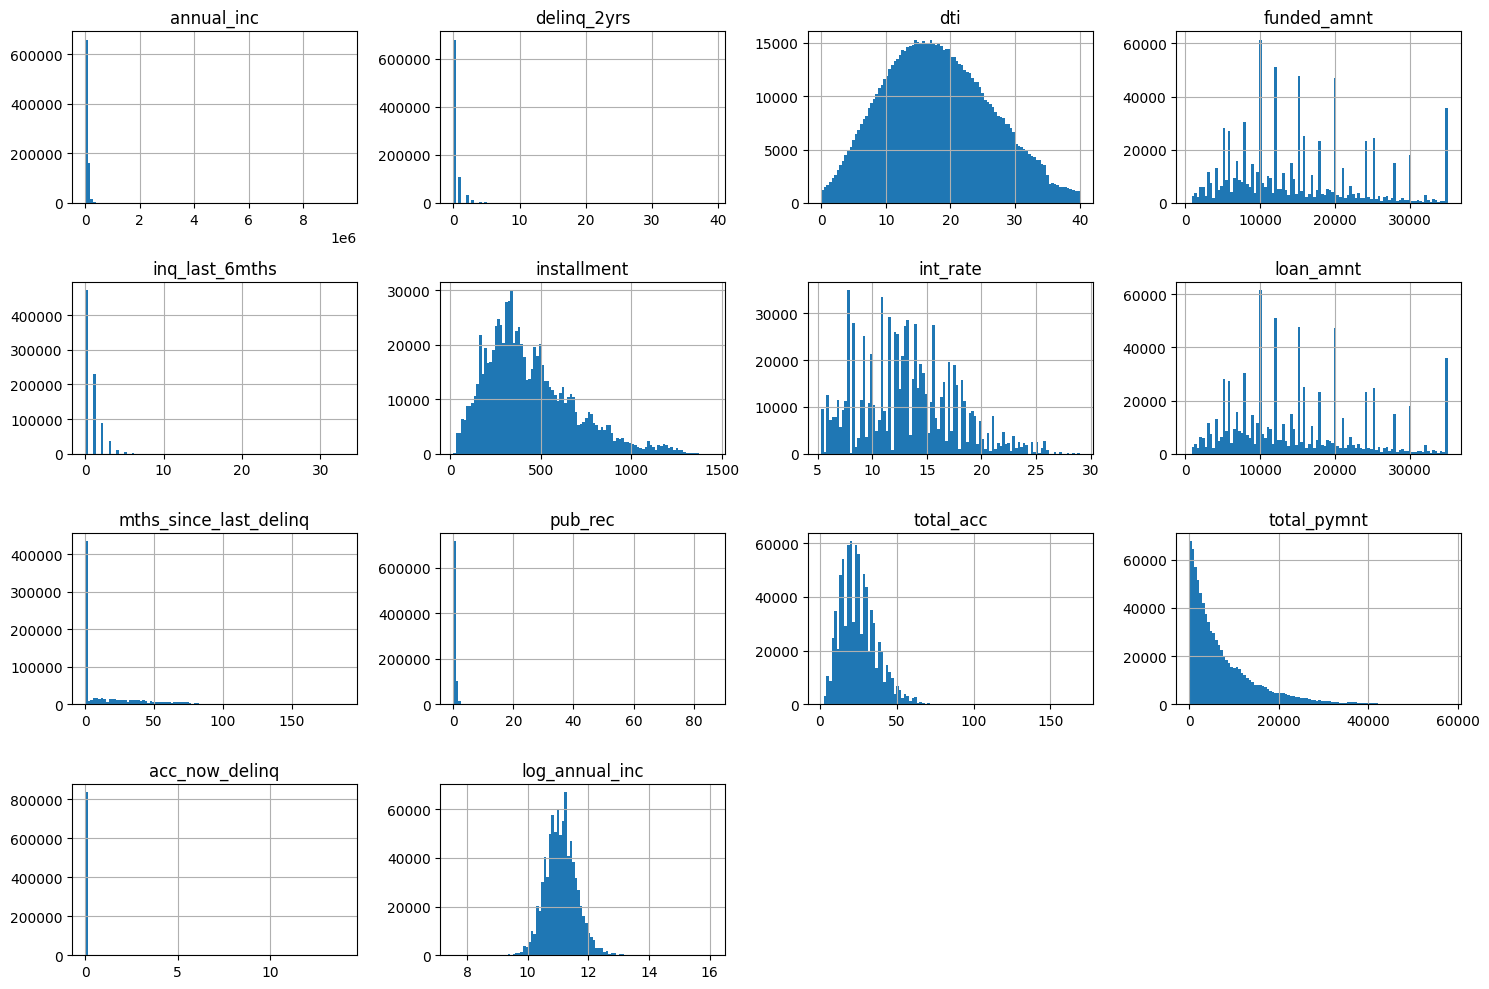

In [103]:
# 1. Basic Information about the Dataset
print("Basic Info:")
print(loan_indv_cleaned.info())
print("\nSummary Statistics:")
print(loan_indv_cleaned.describe())

# 2. Check for Missing Values
print("\nMissing Values:")
print(loan_indv_cleaned.isnull().sum())

# 3. Distribution of Numerical Features
plt.figure(figsize=(15, 10))
#loan_indv_cleaned[np.log(loan_indv_cleaned['annual_inc'])].hist(bins=100, figsize=(15, 10))
loan_indv_cleaned.hist(bins=100, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [ ]:
# 4. Distribution of Categorical Features
categorical_columns = loan_indv_cleaned.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=loan_indv_cleaned)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()



In [ ]:
# 5. Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
# 6. Boxplots for Numerical Features (to check for outliers)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=loan_indv_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.show()



In [ ]:
# 7. Pairplot for Relationships between Features (optional, for small datasets)
sns.pairplot(loan_indv_cleaned)
plt.show()

In [20]:
mapping = {
    'Fully Paid': 1,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Charged Off': 0,
    'Late (31-120 days)': 0,
    'Does not meet the credit policy. Status:Charged Off': 0
}

# Map the loan status to new values
loan_indv_cleaned['loan_status_grouped'] = loan_indv_cleaned['loan_status'].map(mapping)

# Filter to keep only the relevant statuses (1 and 0)
loan_indv_filtered = loan_indv_cleaned.dropna(subset=['loan_status_grouped'])

C:\Users\kevin\AppData\Local\Temp\ipykernel_16500\2208445675.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_indv_cleaned['loan_status_grouped'] = loan_indv_cleaned['loan_status'].map(mapping)


In [24]:
loan_indv_cleaned["loan_status"].value_counts()

loan_status
Current                                                568301
Fully Paid                                             200350
Charged Off                                             42723
Late (31-120 days)                                      10870
Issued                                                   7769
In Grace Period                                          6013
Late (16-30 days)                                        2215
Does not meet the credit policy. Status:Fully Paid       1943
Default                                                  1148
Does not meet the credit policy. Status:Charged Off       743
Name: count, dtype: int64

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
loan_indv_filtered

,annual_inc,delinq_2yrs,dti,emp_title,emp_length,funded_amnt,grade,home_ownership,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,loan_status,mths_since_last_delinq,pub_rec,purpose,sub_grade,term,title,total_acc,total_pymnt,acc_now_delinq,log_annual_inc,loan_status_grouped
0,24000.0,0.0,27.65,NaN,10+ years,5000.0,B,RENT,1.0,162.87,10.65,Dec-2011,5000.0,Fully Paid,0.0,0.0,credit_card,B2,36 months,Computer,9.0,5861.071414,0.0,10.085809,1.0
1,30000.0,0.0,1.00,Ryder,< 1 year,2500.0,C,RENT,5.0,59.83,15.27,Dec-2011,2500.0,Charged Off,0.0,0.0,car,C4,60 months,bike,4.0,1008.710000,0.0,10.308953,0.0
2,12252.0,0.0,8.72,NaN,10+ years,2400.0,C,RENT,2.0,84.33,15.96,Dec-2011,2400.0,Fully Paid,0.0,0.0,small_business,C5,36 months,real estate business,10.0,3003.653644,0.0,9.413444,1.0
3,49200.0,0.0,20.00,AIR RESOURCES BOARD,10+ years,10000.0,C,RENT,1.0,339.31,13.49,Dec-2011,10000.0,Fully Paid,35.0,0.0,other,C1,36 months,personel,37.0,12226.302212,0.0,10.803649,1.0
5,36000.0,0.0,11.20,Veolia Transportaton,3 years,5000.0,A,RENT,3.0,156.46,7.90,Dec-2011,5000.0,Fully Paid,0.0,0.0,wedding,A4,36 months,My wedding loan I promise to pay back,12.0,5631.377753,0.0,10.491274,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887347,63078.0,0.0,31.70,customer service,10+ years,17000.0,D,MORTGAGE,0.0,413.32,15.99,Jan-2015,17000.0,Fully Paid,0.0,0.0,debt_consolidation,D2,60 months,Debt consolidation,28.0,17196.520000,0.0,11.052127,1.0
887351,48000.0,0.0,36.93,supervisor,10+ years,4200.0,D,MORTGAGE,0.0,147.64,15.99,Jan-2015,4200.0,Charged Off,38.0,0.0,medical,D2,36 months,Medical expenses,45.0,1026.020000,0.0,10.778956,0.0
887364,54000.0,1.0,13.22,Coordinator of RSVP,< 1 year,10775.0,A,RENT,0.0,327.95,6.03,Jan-2015,10775.0,Fully Paid,16.0,0.0,debt_consolidation,A1,36 months,Debt consolidation,21.0,11071.870000,0.0,10.896739,1.0
887366,27000.0,0.0,18.58,Painter,2 years,6225.0,D,RENT,1.0,220.37,16.49,Jan-2015,6225.0,Fully Paid,0.0,0.0,debt_consolidation,D3,36 months,Debt consolidation,4.0,7050.460000,0.0,10.203592,1.0


In [25]:
loan_indv_filtered['loan_status_grouped'].value_counts()

loan_status_grouped
1.0    202293
0.0     54336
Name: count, dtype: int64

In [27]:
loan_indv_filtered.to_csv('output.csv', index=False)